# Brain Tumor Detection

Brain tumor is considered as one of the aggressive diseases, among children as well as adults. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.

Despite deep convolutional neural networks achieved impressive progress in medical image computing and analysis, its paradigm of supervised learning demands a large number of training images and complex hyperparameter optimization processes. In clinical practices, collection of huge number of MRIs is difficult to acquire.

In [ ]:
# !pip install tensorflow
# !pip install opencv-python

In [2]:
# Importing required Libraries:
import cv2
# import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

2022-09-09 08:16:09.540481: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-09 08:16:09.885974: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/centos/menv/lib/python3.7/site-packages/cv2/../../lib64:
2022-09-09 08:16:09.886007: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Datapath:
data_path = "../data/images/"

In [4]:
# shape of image:
# im = cv2.imread('../data/images/yes/yes1.jpg')
# print(im.shape)

(218, 180, 3)


In [5]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
train_DataGen = ImageDataGenerator(
                                   rescale = 1./255,
                                   rotation_range = 20,
                                   validation_split = 0.2
                                   )

In [6]:
# this is a generator that will read pictures found in at train_data_path and indefinitely generate batches of augmented image data
training_data = train_DataGen.flow_from_directory(
                                                  directory = data_path,
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode = 'binary',
                                                  subset = 'training'
                                                 )

Found 201 images belonging to 2 classes.


In [7]:
# this is a generator that will read pictures found in at train_data_path and indefinitely generate batches of augmented image data
validation_data = train_DataGen.flow_from_directory(
                                                    directory = data_path,
                                                    target_size = (128,128),
                                                    batch_size = 3,
                                                    class_mode = 'binary',
                                                    subset = 'validation'
                                                   )

Found 50 images belonging to 2 classes.


In [8]:
# Training data class labels:
# training_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [9]:
# Validation data class labels:
# validation_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
# creating function for plotting images:
# def plotImages(images_arr):
#     fig, axes = plt.subplots(1, 5, figsize=(20, 20))
#     axes = axes.flatten()
#     for img, ax in zip(images_arr, axes):
#         ax.imshow(img)
#     plt.tight_layout()
#     plt.show()

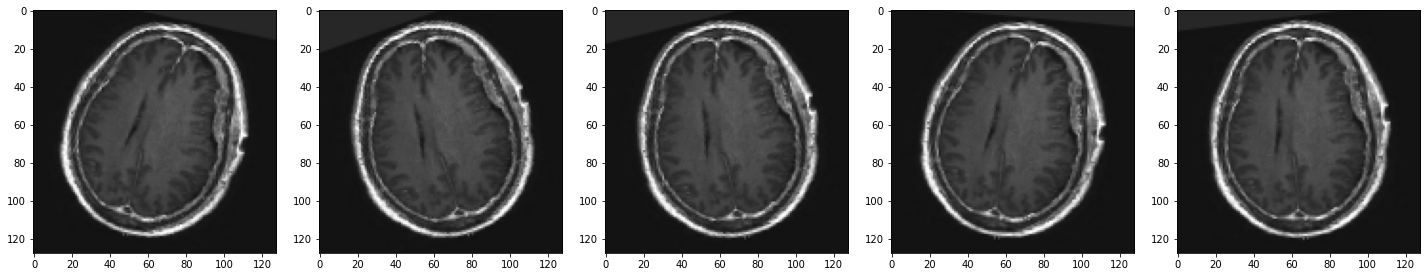

In [11]:
# Plotting images:
# images = [training_data[0][0][0] for i in range(5)]
# plotImages(images)

In [12]:
# Creating model:
model = Sequential()

# Convolutional layer:
model.add(Conv2D(input_shape = (128,128,3), activation = 'relu', filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer:
model.add(Conv2D(filters = 64, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer:
model.add(Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization:
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer:
model.add(Conv2D(filters = 256, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization:
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Dropout layer:
model.add(Dropout(0.5))

# Flatten layer:
model.add(Flatten())

# Dense layer:
model.add(Dense(64, activation = 'relu'))

# Dropout layer:
model.add(Dropout(0.2))

# Dense layer:
model.add(Dense(128, activation = 'relu'))

# Dropout layer:
model.add(Dropout(0.4))

# Dense layer:
model.add(Dense(256, activation = 'relu'))

# Dropout layer:
model.add(Dropout(0.5))

# Output layer:
model.add(Dense(2, activation = 'softmax'))

2022-09-09 08:17:45.456001: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/centos/menv/lib/python3.7/site-packages/cv2/../../lib64:
2022-09-09 08:17:45.456080: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-09 08:17:45.456134: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ai-vm1.novalocal): /proc/driver/nvidia/version does not exist
2022-09-09 08:17:45.457083: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# model summary:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                        

In [13]:
# compile the model:
model.compile(
              optimizer = Adam(lr = 0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

/home/centos/menv/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
# Used Early stopping to avoid overfitting 
callback = tf.keras.callbacks.EarlyStopping(
                                            monitor='val_loss', 
                                            mode = 'min', 
                                            patience=5
                                           )

In [15]:
# Fitting the training data to our model:
history = model.fit(
                              training_data,
                              validation_data = validation_data,
                              epochs = 10,
                              verbose = 1,
                              shuffle = True,
                              callbacks = [callback]
                             )

Epoch 1/10
7/7 [==============================] - 8s 767ms/step - loss: 1.8384 - accuracy: 0.6070 - val_loss: 0.5940 - val_accuracy: 0.6600
Epoch 2/10
7/7 [==============================] - 5s 645ms/step - loss: 1.4572 - accuracy: 0.6169 - val_loss: 0.5806 - val_accuracy: 0.7600
Epoch 3/10
7/7 [==============================] - 5s 714ms/step - loss: 1.0406 - accuracy: 0.6517 - val_loss: 0.6096 - val_accuracy: 0.7400
Epoch 4/10
7/7 [==============================] - 5s 710ms/step - loss: 0.6956 - accuracy: 0.6766 - val_loss: 0.5880 - val_accuracy: 0.6800
Epoch 5/10
7/7 [==============================] - 6s 775ms/step - loss: 0.6051 - accuracy: 0.7015 - val_loss: 0.5515 - val_accuracy: 0.8000
Epoch 6/10
7/7 [==============================] - 5s 655ms/step - loss: 0.5784 - accuracy: 0.7114 - val_loss: 0.4771 - val_accuracy: 0.7800
Epoch 7/10
7/7 [==============================] - 5s 646ms/step - loss: 0.5393 - accuracy: 0.7761 - val_loss: 0.5209 - val_accuracy: 0.7400
Epoch 8/10
7/7 [====

In [16]:
# On which iteration early stopping is called:
len(history.history['loss'])

10

In [17]:
results = model.evaluate(validation_data)
results

17/17 [==============================] - 1s 28ms/step - loss: 0.4668 - accuracy: 0.7800


[0.46676701307296753, 0.7799999713897705]

In [18]:
print('Test accuracy : ', results[1])

Test accuracy :  0.7799999713897705


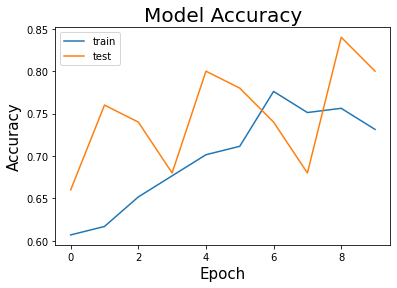

In [19]:
# Summarize history for accuracy:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

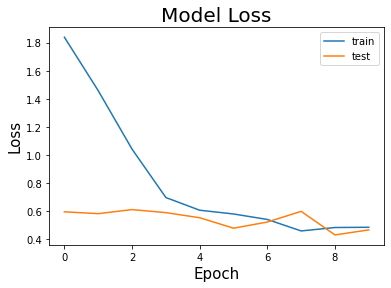

In [20]:
# summarize history for loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.save('../models/tumor_model.h5')